In [ ]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1C4Y_z4jUyY_egMmLcHkukY5wlL16E_TB"})   # замените id на id своего файла
downloaded.GetContentFile('transactions.csv')

In [ ]:
transactions = pd.read_csv("transactions.csv", sep=",", nrows=1_000_000)
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
999995,98801178,269 10:29:06,5921,1010,-23016.59,127873
999996,98801178,270 10:26:45,5211,1010,-61380.88,10114209
999997,98801178,270 15:18:53,5921,1010,-11800.27,10105341
999998,98801178,271 12:47:13,5211,1010,-16170.59,10114209


In [ ]:
downloaded = drive.CreateFile({'id':"1V-chwc_VYaHQPcAx_W8yxHH2MpbO3PXP"})   # замените id на id своего файла
downloaded.GetContentFile('gender_train.csv')

In [ ]:
gender_train = pd.read_csv("gender_train.csv", sep=",")
gender_train

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
...,...,...
8395,90417572,0
8396,66837341,0
8397,10758984,1
8398,11376556,0


In [ ]:
downloaded = drive.CreateFile({'id':"1kOI2RiitJ7Jeuy7tYmVyk2m0H4PmAdYu"})   # замените id на id своего файла
downloaded.GetContentFile('tr_mcc_codes.csv')

In [ ]:
tr_mcc_codes = pd.read_csv("tr_mcc_codes.csv", sep=";")
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [ ]:
downloaded = drive.CreateFile({'id':"1BOafFNrWnMjrFURHwkjvQn21TkzZmSAB"})   # замените id на id своего файла
downloaded.GetContentFile('tr_types.csv')

In [ ]:
tr_types = pd.read_csv("tr_types.csv", sep=";")
tr_types

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...
...,...,...
150,2990,Списание по требованию
151,2992,Списание средств для погашения задолженности п...
152,3001,Комиссия за обслуживание ссудного счета
153,3030,Плата за обслуживание банковской карты (за пос...



Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [ ]:
# 1
random_tr_type = pd.DataFrame(transactions['tr_type'].sample(n=1000))
random_tr_type.reset_index()

,index,tr_type
0,710370,7070
1,785230,7070
2,861370,2010
3,777968,2010
4,965922,7010
...,...,...
995,231811,1110
996,187276,1110
997,112820,1010
998,395625,7031


In [ ]:
# 2
tr_types_based_on_random_tr_type = tr_types[tr_types["tr_type"].isin(random_tr_type["tr_type"])] 

tr_types_with_ATM_or_POS = tr_types_based_on_random_tr_type[(tr_types_based_on_random_tr_type["tr_description"].str.contains("АТМ")) | 
                                                            (tr_types_based_on_random_tr_type["tr_description"].str.contains("POS"))]

ok_transactions = len(random_tr_type[random_tr_type["tr_type"].isin(tr_types_with_ATM_or_POS["tr_type"])])
print(ok_transactions * 100 / 1000, "%")
# tr_types_based_on_random_tr_type
# tr_types_with_ATM_or_POS

61.7 %


## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
# 1
tr_types_in_transactions = pd.DataFrame(transactions["tr_type"].value_counts(normalize="True"))
tr_types_in_transactions.rename(columns = {"tr_type": "frequency"}, inplace=True)
tr_types_in_transactions.index.name = "tr_type"

tr_types_in_transactions

,frequency
tr_type,
1010,0.231117
2010,0.151166
7070,0.149006
1110,0.137658
1030,0.118975
...,...
4061,0.000004
4096,0.000004
8146,0.000003


In [ ]:
# 2
top_10_tr_types = tr_types_in_transactions.head(10)
top_10_with_tr_description = tr_types[tr_types["tr_type"].isin(top_10_tr_types.index)]
top_10_with_tr_description["frequency"] = top_10_tr_types["frequency"].sort_index().values
top_10_with_tr_description.sort_values(by="frequency", ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,tr_type,tr_description,frequency
0,39,7010,Взнос наличных через АТМ (в своем тер.банке),0.231117
1,98,1010,Покупка. POS ТУ СБ РФ,0.151166
2,106,2010,Выдача наличных в АТМ Сбербанк России,0.149006
3,60,7071,Перевод на карту (с карты) через Мобильный бан...,0.137658
4,47,7030,Перевод на карту (с карты) через АТМ (в предел...,0.118975
5,99,1030,Оплата услуги. Банкоматы СБ РФ,0.049830
6,100,1100,Покупка. ТУ Россия,0.028972
7,101,1110,Покупка. POS ТУ Россия,0.026078
8,129,2370,Списание с карты на карту по операции <перевод...,0.015781
9,59,7070,Перевод на карту (с карты) через Мобильный бан...,0.015476


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
transactions_sum = transactions[transactions["amount"] > 0]
transactions_sum["total_amount"] = transactions_sum.groupby("customer_id")["amount"].transform(sum)
transactions_sum_sort = transactions_sum.sort_values(by="total_amount", ascending=False).reset_index()
biggest_total_sum_customer = transactions_sum_sort.at[0, "customer_id"]
biggest_total_sum_customer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


70780820

In [ ]:
transactions_expenses = transactions[transactions["amount"] < 0]
transactions_expenses["total_amount"] = transactions_expenses.groupby("customer_id")["amount"].transform(sum)
transactions_expenses_sort = transactions_expenses.sort_values(by="total_amount").reset_index()
biggest_total_expenses_customer = transactions_expenses_sort.at[0, "customer_id"]
biggest_total_expenses_customer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


70780820

In [ ]:
total_sum_from_first = transactions_sum_sort[transactions_sum_sort["customer_id"] == 
                                                       biggest_total_sum_customer].at[0, "total_amount"]
total_sum_from_second = transactions_sum_sort[transactions_sum_sort["customer_id"] == 
                                                       biggest_total_expenses_customer].at[0, "total_amount"]
total_expenses_from_first = transactions_expenses_sort[transactions_expenses_sort["customer_id"] == 
                                                       biggest_total_sum_customer].at[0, "total_amount"]
total_expenses_from_second = transactions_expenses_sort[transactions_expenses_sort["customer_id"] == 
                                                       biggest_total_expenses_customer].at[0, "total_amount"] 
print("for ", biggest_total_sum_customer, ": ", total_sum_from_first - total_expenses_from_first)
print("for ", biggest_total_expenses_customer, ": ", total_sum_from_second - total_expenses_from_second)                                                  

for  70780820 :  2498067091.600018
for  70780820 :  2498067091.600018


## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
top_10_transactions = transactions[transactions["tr_type"].isin(top_10_tr_types.index)]
mean_and_median = pd.DataFrame(top_10_transactions.groupby("tr_type")["amount"].mean())
mean_and_median.rename(columns = {"amount": "mean"}, inplace=True)
mean_and_median["median"] = top_10_transactions.groupby("tr_type")["amount"].median()
mean_and_median

,mean,median
tr_type,,
1010,-19784.748640,-7411.52
1030,-5320.980222,-2245.92
1100,-44061.827262,-10188.26
1110,-32119.330371,-11207.57
2010,-136077.629325,-44918.32
2370,-205418.249032,-44918.32
7010,276391.789596,112295.79
7030,86104.332909,13951.52
7070,65569.831700,11319.42


In [ ]:
client_tr_types = transactions[transactions["customer_id"] == biggest_total_sum_customer]
mean_and_median_client = pd.DataFrame(client_tr_types.groupby("tr_type")["amount"].mean())
mean_and_median_client.rename(columns = {"amount": "mean"}, inplace=True)
mean_and_median_client["median"] = client_tr_types.groupby("tr_type")["amount"].median()
mean_and_median_client

,mean,median
tr_type,,
2010,-2.941056e+06,-3368873.660
2330,-2.382398e+06,-2245915.770
2370,-2.218505e+06,-2245915.770
6110,1.756293e+04,10028.010
7020,1.465129e+04,10319.985
7021,2.850067e+04,28500.670
7030,1.406196e+04,8848.910
7031,1.921036e+04,12992.620
7034,1.430648e+04,14306.480


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
transactions_under_0_gender = transactions[transactions["amount"] < 0].groupby("gender")["amount"].mean()
abs(transactions_under_0_gender[0] - transactions_under_0_gender[1])

32718.05492022563

In [ ]:
transactions_bigger_0_gender = transactions[transactions["amount"] > 0].groupby("gender")["amount"].mean()
abs(transactions_bigger_0_gender[0] - transactions_bigger_0_gender[1])

63366.57104800751

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
# 1 (gender: 0)
transactions_bigger_0 = transactions[transactions["amount"] > 0]
max_income_for_0 = pd.DataFrame(transactions_bigger_0[transactions_bigger_0["gender"] == 0.0].groupby("tr_type")["amount"].max())
max_10_in_0 = max_income_for_0.sort_values(by="amount").head(10)
# max_income_for_0
max_10_in_0
# transactions_for_gender_0_bigger_0

,amount
tr_type,
4051,1122.96
4110,2245.92
4210,2245.92
2370,2335.75
4100,5041.86
7075,6737.75
2110,22459.16
1010,24839.83
2010,44918.32


In [ ]:
# 1 (gender: 1)
max_income_for_1 = pd.DataFrame(transactions_bigger_0[transactions_bigger_0["gender"] == 1.0].groupby("tr_type")["amount"].max())
max_10_in_1 = max_income_for_1.sort_values(by="amount").head(10)
max_10_in_1

,amount
tr_type,
4110,2245.92
2020,2245.92
1010,28803.87
8100,64682.37
6000,79280.83
7041,87590.72
2010,89836.63
2110,112295.79
2370,113194.15


In [ ]:
# 2
pd.Series(max_10_in_0[max_10_in_0.index.isin(max_10_in_1.index.values)].index.values)

0    4110
1    2370
2    2110
3    1010
4    2010
dtype: int64

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
# 1 (gender: 0)
transactions_under_0 = transactions[transactions["amount"] < 0]
transactions_by_mcc_gender_0 = pd.DataFrame(transactions_under_0[transactions_under_0["gender"] == 0.0].groupby("mcc_code")["amount"].sum())
transactions_by_mcc_gender_0

,amount
mcc_code,
742,-386207.68
1711,-674897.69
1799,-261626.73
2741,-20746.42
3000,-74431645.27
...,...
8699,-521107.48
8999,-19432057.92
9222,-361143.24


In [ ]:
# 1 (gender: 1)
transactions_by_mcc_gender_1 = pd.DataFrame(transactions_under_0[transactions_under_0["gender"] == 1.0].groupby("mcc_code")["amount"].sum())
transactions_by_mcc_gender_1

,amount
mcc_code,
742,-132277.93
1711,-206264.90
1731,-121542.67
1799,-1129257.68
2741,-221290.08
...,...
8999,-28643346.63
9222,-988205.17
9311,-373271.22


In [ ]:
# 2
transactions_by_mcc_gender_0.rename(columns = {"amount": "amount_gender_0"}, inplace=True)
transactions_by_mcc_gender_1.rename(columns = {"amount": "amount_gender_1"}, inplace=True)
transactions_by_mcc_merged = pd.merge(transactions_by_mcc_gender_0, transactions_by_mcc_gender_1, on="mcc_code")
transactions_by_mcc_merged["difference_module"] = abs(transactions_by_mcc_merged["amount_gender_0"] - transactions_by_mcc_merged["amount_gender_1"])
top_10_mcc_merged = transactions_by_mcc_merged.sort_values(by="difference_module", ascending=False).head(10)
top_10_mcc_merged_with_description = pd.merge(top_10_mcc_merged, tr_mcc_codes, on="mcc_code")
top_10_mcc_merged_with_description

,mcc_code,amount_gender_0,amount_gender_1,difference_module,mcc_description
0,6011,-4.958077e+09,-8.043939e+09,3.085862e+09,Финансовые институты — снятие наличности автом...
1,4829,-3.513864e+09,-6.013017e+09,2.499153e+09,Денежные переводы
2,6010,-2.612731e+08,-4.821311e+08,2.208580e+08,Финансовые институты — снятие наличности вручную
3,5541,-5.162489e+07,-2.070574e+08,1.554326e+08,Станции техобслуживания
4,5511,-5.095159e+06,-7.862393e+07,7.352877e+07,"Легковой и грузовой транспорт — продажа, серви..."
5,5812,-5.787961e+07,-1.282582e+08,7.037856e+07,"Места общественного питания, рестораны"
6,5977,-7.360784e+07,-3.119022e+07,4.241762e+07,Магазины косметики
7,5533,-1.278980e+07,-5.512787e+07,4.233808e+07,Автозапчасти и аксессуары
8,7995,-1.189100e+05,-4.091455e+07,4.079564e+07,Транзакции по азартным играм
9,5661,-8.183139e+07,-4.367668e+07,3.815470e+07,Обувные магазины


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

# доп задания


Оставьте в датафрейме только тех клиентов,  которые совершили более 100 транзакций. Удалите также 5 клиентов, у которых больше всего транзакций.

Возьмите 10 категорий из задания 7. Оставьте в датафрейме только транзакции по этим категориям.

Постройте для каждого пола диаграмму, на которой показано распределение их трат по этим категориям.

In [ ]:
transactions_more_100 = transactions.groupby('customer_id')['tr_datetime'].count().sort_values()
transactions_more_100 = transactions_more_100.head(len(transactions_more_100) - 5)
transactions_more_100 = transactions_more_100[transactions_more_100.values > 100]
transactions_more_100_1 = transactions[transactions['customer_id'].isin(transactions_more_100.index)]
transactions_more_100_1


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


In [ ]:
transactions_more_100_2 = transactions_more_100_1[transactions_more_100_1['mcc_code'].isin(top_10_mcc_merged_with_description['mcc_code'])]
transactions_more_100_2

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
120373,20297899,130 00:00:00,4829,1100,-22459.16,NaN,NaN,Денежные переводы,Покупка. ТУ Россия
120374,34124149,206 00:00:00,4829,1100,-229.08,NaN,NaN,Денежные переводы,Покупка. ТУ Россия
120375,34124149,212 00:00:00,4829,1100,-916.33,24810017,NaN,Денежные переводы,Покупка. ТУ Россия
120376,34124149,218 00:00:00,4829,1100,-114.54,24810017,NaN,Денежные переводы,Покупка. ТУ Россия
120377,34124149,221 00:00:00,4829,1100,-916.33,24810017,NaN,Денежные переводы,Покупка. ТУ Россия
...,...,...,...,...,...,...,...,...,...
998323,20297899,391 00:00:00,7995,6210,112295.79,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ
998324,20297899,393 00:00:00,7995,6210,11229.58,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ
998325,20297899,395 00:00:00,7995,6210,101066.21,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ
998326,5577042,228 00:00:00,7995,6210,8759.07,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ


In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
transactions_100_10_gender_0 = transactions_more_100_2[transactions_more_100_2['gender'] == 0.0]
mcc_code_stats_gender_0 = transactions_100_10_gender_0.groupby('mcc_code')['amount'].sum()
mcc_code_stats_gender_0

mcc_code
4829   -3.386171e+09
5511   -5.095159e+06
5533   -1.266140e+07
5541   -5.128537e+07
5661   -7.908077e+07
5812   -5.752176e+07
5977   -7.290346e+07
6010    3.268665e+09
6011   -2.341940e+09
7995   -1.155187e+05
Name: amount, dtype: float64

<BarContainer object of 10 artists>

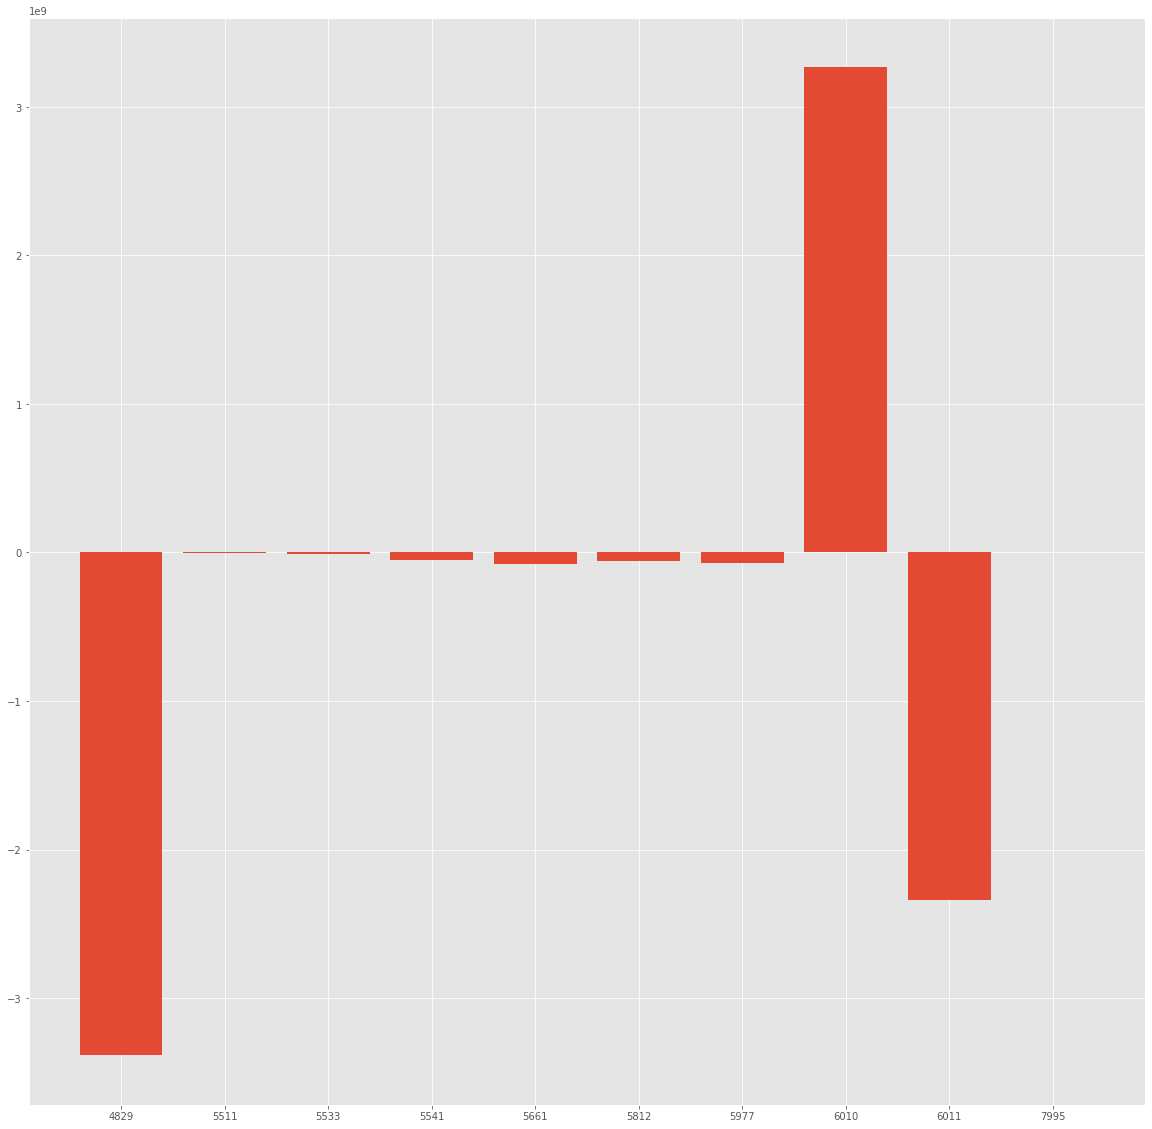

In [ ]:
plt.figure(figsize=(20, 20))
plt.bar([str(item) for item in mcc_code_stats_gender_0.index], mcc_code_stats_gender_0.values)

In [ ]:
transactions_100_10_gender_1 = transactions_more_100_2[transactions_more_100_2['gender'] == 1.0]
mcc_code_stats_gender_1 = transactions_100_10_gender_1.groupby('mcc_code')['amount'].sum()
mcc_code_stats_gender_1

mcc_code
4829   -5.549027e+09
5511   -7.779687e+07
5533   -5.423841e+07
5541   -2.042136e+08
5661   -4.248028e+07
5812   -1.277541e+08
5977   -3.056935e+07
6010    4.671033e+09
6011   -3.373760e+09
7995   -4.012547e+07
Name: amount, dtype: float64

<BarContainer object of 10 artists>

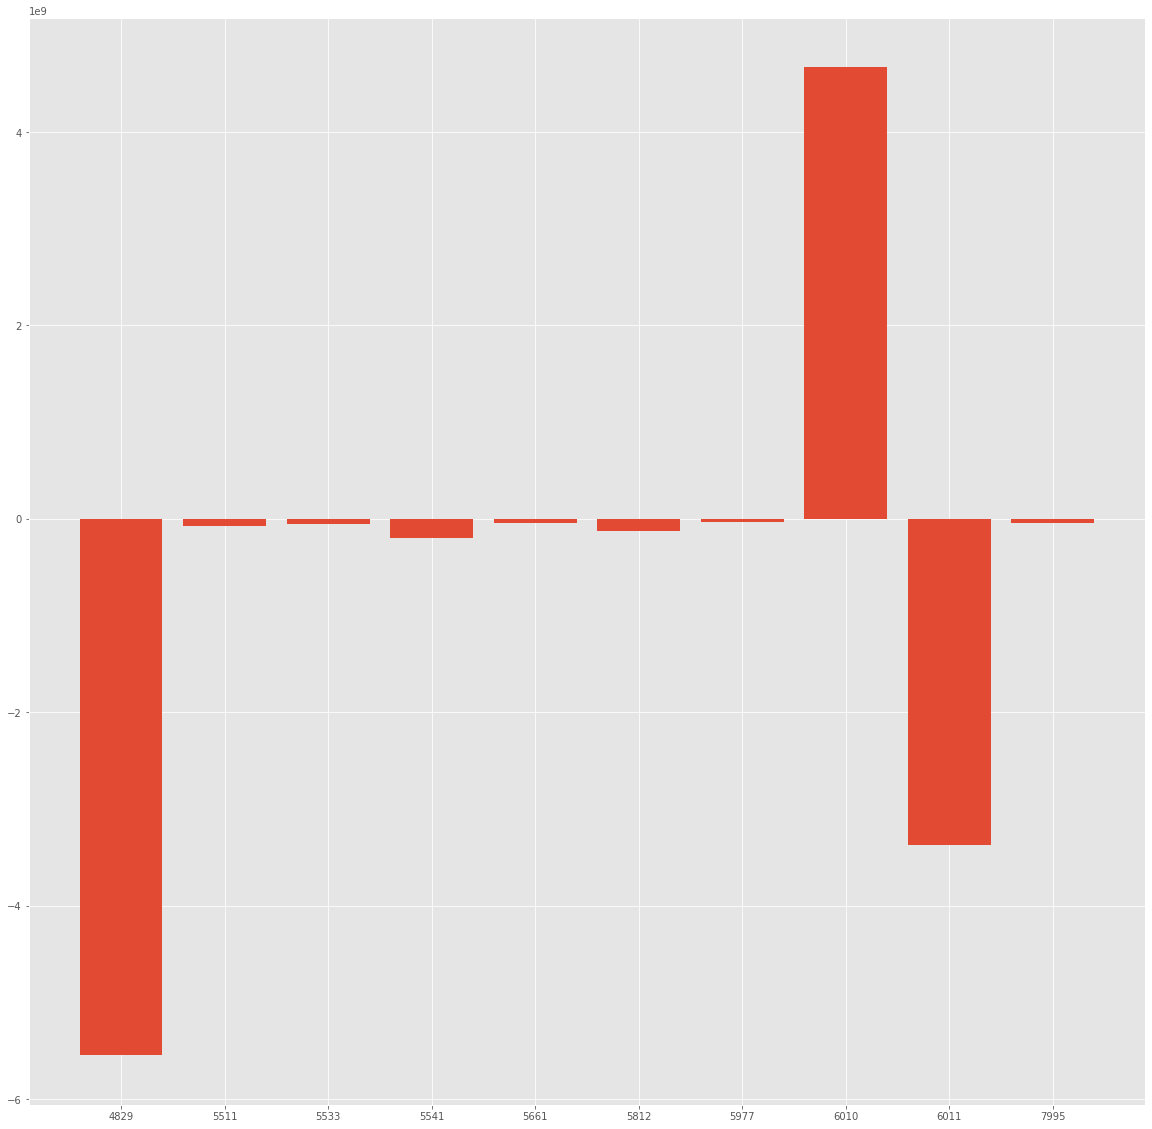

In [ ]:
plt.figure(figsize=(20, 20))
plt.bar([str(item) for item in mcc_code_stats_gender_1.index], mcc_code_stats_gender_1.values)